# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [2]:
# Paso 1: Cargar los Datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
df_flights = pd.read_csv('flights.csv')
df_flights.head()


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    R - Identify any null or missing data, and impute appropriate replacement values.
    R - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    R - View summary statistics for the numeric fields in the dataset.
    R - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        R - *What are the average (mean) departure and arrival delays?*
        R - *How do the carriers compare in terms of arrival delay performance?*
        R - *Is there a noticable difference in arrival delays for different days of the week?*
        R - *Which departure airport has the highest average departure delay?*
        * - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        * - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        R - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.


In [3]:
# Paso 2: Limpieza de Datos

# a. Identificar Valores Faltantes
valores_faltantes = df_flights.isnull().sum()
print("Valores Faltantes:\n", valores_faltantes)

# Imputar valores faltantes (por ejemplo, usando la mediana para los retrasos)
df_flights['DepDelay'] = df_flights['DepDelay'].fillna(df_flights['DepDelay'].median())
df_flights['ArrDelay'] = df_flights['ArrDelay'].fillna(df_flights['ArrDelay'].median())

# b. Identificar Valores Atípicos usando el método IQR
Q1 = df_flights[['DepDelay', 'ArrDelay']].quantile(0.25)
Q3 = df_flights[['DepDelay', 'ArrDelay']].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Eliminar valores atípicos
df_flights = df_flights[
    (df_flights['DepDelay'] >= limite_inferior['DepDelay']) & 
    (df_flights['DepDelay'] <= limite_superior['DepDelay']) & 
    (df_flights['ArrDelay'] >= limite_inferior['ArrDelay']) & 
    (df_flights['ArrDelay'] <= limite_superior['ArrDelay'])
]

Valores Faltantes:
 Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64


            DepDelay       ArrDelay
count  235067.000000  235067.000000
mean        0.373447      -4.029843
std         8.029744      12.959713
min       -23.000000     -42.000000
25%        -5.000000     -13.000000
50%        -2.000000      -5.000000
75%         3.000000       3.000000
max        28.000000      41.000000


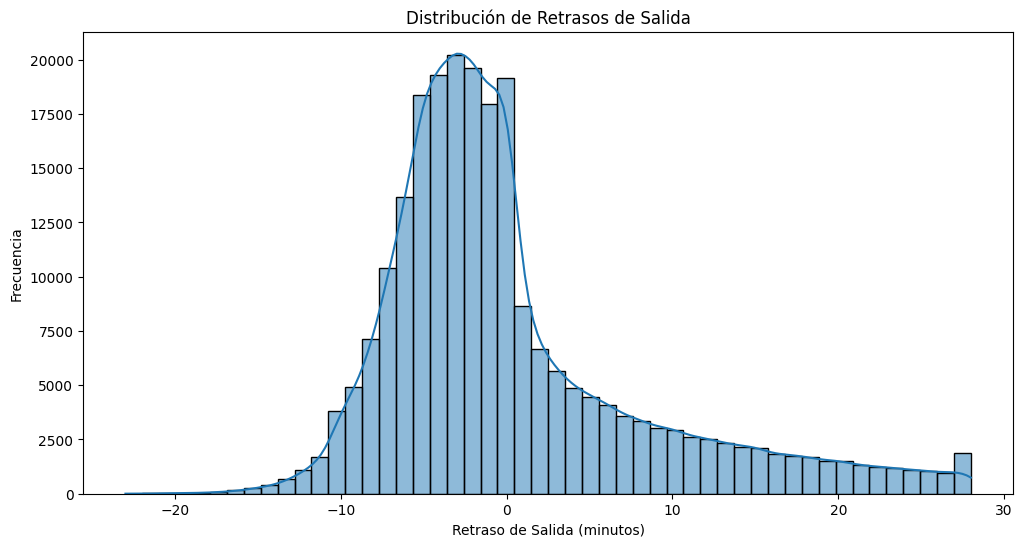

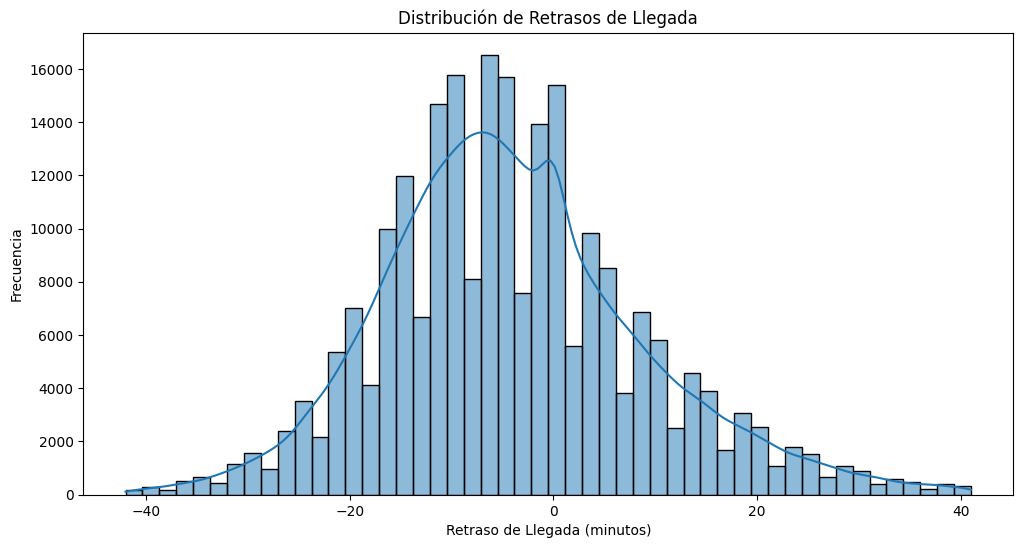

In [4]:
# Paso 3: Exploración de Datos

# a. Estadísticas Resumidas
print(df_flights[['DepDelay', 'ArrDelay']].describe())

# b. Distribución de Retrasos
plt.figure(figsize=(12, 6))
sns.histplot(df_flights['DepDelay'], bins=50, kde=True)
plt.title('Distribución de Retrasos de Salida')
plt.xlabel('Retraso de Salida (minutos)')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_flights['ArrDelay'], bins=50, kde=True)
plt.title('Distribución de Retrasos de Llegada')
plt.xlabel('Retraso de Llegada (minutos)')
plt.ylabel('Frecuencia')
plt.show()


Retraso medio de salida: 0.37 minutos
Retraso medio de llegada: -4.03 minutos


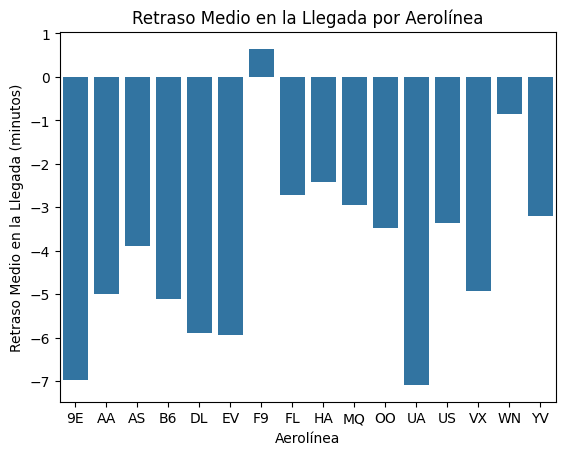

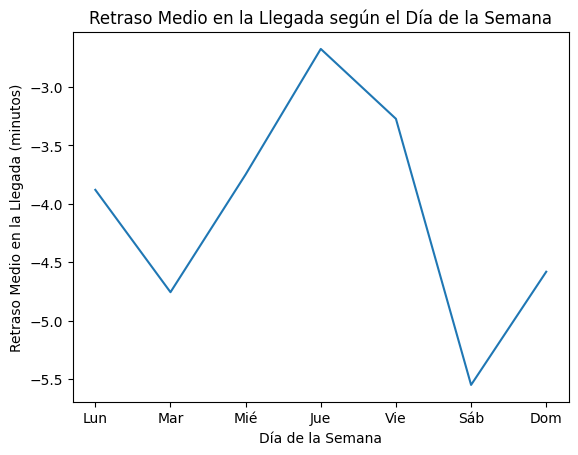

Aeropuerto con mayor retraso medio en salida: Chicago Midway International (5.00 minutos)


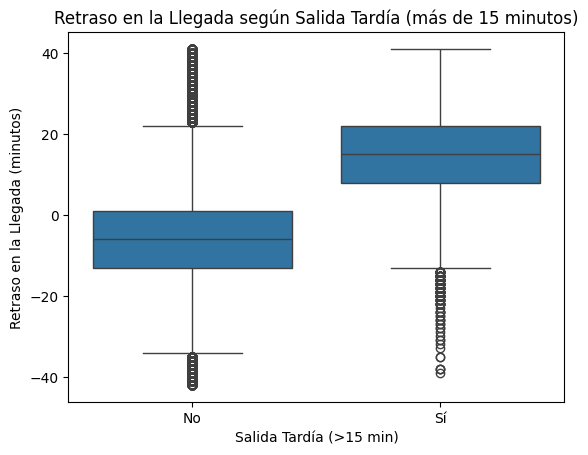

Ruta con más llegadas tardías: San Francisco International a Los Angeles International
Ruta con mayor retraso medio en llegada: Louis Armstrong New Orleans International a Ronald Reagan Washington National (25.33 minutos)


In [5]:
# Paso 4: Análisis de Datos

# a. Calcular retrasos medios
media_retraso_salida = df_flights['DepDelay'].mean()
media_retraso_llegada = df_flights['ArrDelay'].mean()
print(f"Retraso medio de salida: {media_retraso_salida:.2f} minutos")
print(f"Retraso medio de llegada: {media_retraso_llegada:.2f} minutos")

# b. Comparar el rendimiento en retrasos de llegada de diferentes aerolíneas
retraso_por_aerolinea = df_flights.groupby('Carrier')['ArrDelay'].mean().reset_index()
sns.barplot(x='Carrier', y='ArrDelay', data=retraso_por_aerolinea)
plt.title('Retraso Medio en la Llegada por Aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Retraso Medio en la Llegada (minutos)')
plt.show()

# c. Analizar retrasos según el día de la semana
retraso_por_dia = df_flights.groupby('DayOfWeek')['ArrDelay'].mean().reset_index()
sns.lineplot(x='DayOfWeek', y='ArrDelay', data=retraso_por_dia)
plt.title('Retraso Medio en la Llegada según el Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Retraso Medio en la Llegada (minutos)')
plt.xticks(ticks=np.arange(1, 8), labels=['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
plt.show()

# d. Aeropuerto de salida con mayor retraso medio
retraso_por_aeropuerto = df_flights.groupby('OriginAirportName')['DepDelay'].mean().reset_index()
aeropuerto_mayor_retraso = retraso_por_aeropuerto.loc[retraso_por_aeropuerto['DepDelay'].idxmax()]
print(f"Aeropuerto con mayor retraso medio en salida: {aeropuerto_mayor_retraso['OriginAirportName']} ({aeropuerto_mayor_retraso['DepDelay']:.2f} minutos)")

df_flights['DelDelay15'] = df_flights['DepDelay'] > 15

# e. Investigar si salidas tardías conducen a llegadas más tardías
sns.boxplot(x='DelDelay15', y='ArrDelay', data=df_flights)
plt.title('Retraso en la Llegada según Salida Tardía (más de 15 minutos)')
plt.xlabel('Salida Tardía (>15 min)')
plt.ylabel('Retraso en la Llegada (minutos)')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

# f. Determinar la ruta con más llegadas tardías
ruta_mas_tardia = df_flights[df_flights['ArrDelay'] > 0].groupby(['OriginAirportName', 'DestAirportName']).size().reset_index(name='Cantidad')
ruta_mas_tardia = ruta_mas_tardia.loc[ruta_mas_tardia['Cantidad'].idxmax()]
print(f"Ruta con más llegadas tardías: {ruta_mas_tardia['OriginAirportName']} a {ruta_mas_tardia['DestAirportName']}")

# g. Ruta con mayor retraso medio en llegada
ruta_mayor_retraso = df_flights.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean().reset_index()
ruta_mayor_retraso = ruta_mayor_retraso.loc[ruta_mayor_retraso['ArrDelay'].idxmax()]
print(f"Ruta con mayor retraso medio en llegada: {ruta_mayor_retraso['OriginAirportName']} a {ruta_mayor_retraso['DestAirportName']} ({ruta_mayor_retraso['ArrDelay']:.2f} minutos)")